## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

### Import and Instantiate

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

### Clean Missing Values

In [3]:
unique_states = list(df.STATE.unique())

appended_data = []

for state in unique_states:
    state_df = df[df.STATE == state].copy().sort_values('YEAR').interpolate(limit_direction='both')
    appended_data.append(state_df)

filled_df = pd.concat(appended_data)

filled_df.dropna(thresh=12, inplace=True) 

In [4]:
df = filled_df

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [5]:
df.describe().iloc[:, 0:6]

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
count,1331.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03
mean,2004.515402,9.129644e+05,9.256140e+06,7.776838e+05,4.293872e+06,4.184584e+06
std,7.493076,1.063103e+06,1.201221e+07,1.156231e+06,5.677157e+06,5.613959e+06
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04
25%,1998.000000,2.560480e+05,2.207700e+06,1.911455e+05,1.174059e+06,7.358395e+05
50%,2005.000000,6.480840e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06
75%,2011.000000,1.006874e+06,1.109900e+07,8.431690e+05,5.185174e+06,4.808003e+06
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07


In [6]:
df.describe().iloc[:, 6:11]

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03
mean,9.352575e+06,4.849118e+06,2.727491e+06,4.283329e+05,9.111286e+05
std,1.221749e+07,6.436594e+06,3.420439e+06,5.369434e+05,1.336270e+06
min,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,2.182970e+06,1.177708e+06,6.460350e+05,1.010325e+05,1.840940e+05
50%,5.298267e+06,2.688963e+06,1.545738e+06,2.687150e+05,5.181810e+05
75%,1.087317e+07,5.641158e+06,3.307162e+06,5.165750e+05,9.839960e+05
max,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07


In [7]:
df.describe().iloc[:, 11:19]

,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1.331000e+03,1.331000e+03,1.331000e+03
mean,19548.346356,69866.448535,70725.366642,70372.664914,60139.822690,5.685511e+05,2.719494e+05,8.600964e+05
std,31360.884952,82793.100694,82713.230404,81111.115840,70677.865347,6.617301e+05,3.176011e+05,1.003027e+06
min,0.000000,3459.000000,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04
25%,2630.500000,20032.000000,19814.000000,20214.000000,17074.000000,1.610640e+05,7.650500e+04,2.392380e+05
50%,9802.000000,49306.000000,49875.000000,49523.000000,40034.000000,4.014360e+05,1.830550e+05,6.059990e+05
75%,24999.500000,79544.000000,79321.000000,80206.500000,70997.000000,6.403730e+05,3.156855e+05,9.685840e+05
max,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06


In [8]:
df.describe().iloc[:, 19:]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1331.000000,1331.000000,1331.000000,1331.000000
mean,232.730088,277.335925,218.455319,262.977955
std,10.520429,10.202729,7.791037,6.145555
min,187.134670,232.831510,178.557612,236.379102
25%,226.217989,271.470509,214.442087,259.157004
50%,234.422377,279.025070,220.066378,264.111352
75%,240.858190,284.108611,223.743760,267.333304
max,253.420961,300.568235,236.773867,280.499130


In [9]:
df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1331,1331
unique,1326,51
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [10]:
co_df = df[df.STATE == 'COLORADO']

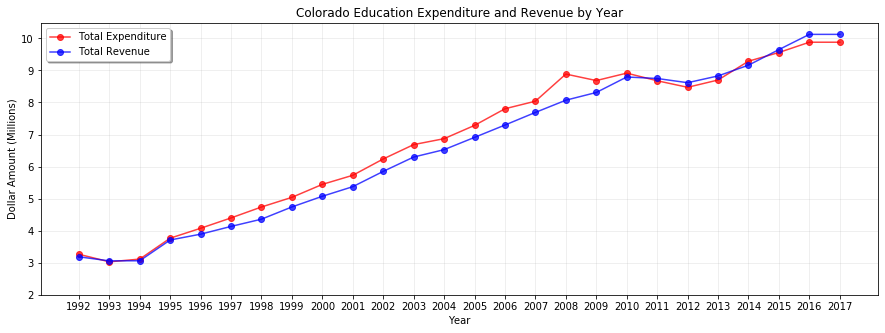

In [11]:
plt.figure(figsize=(15,5))
plt.plot(co_df.YEAR, co_df.TOTAL_EXPENDITURE, color='red', label='Total Expenditure', alpha=.75, marker='o')
plt.plot(co_df.YEAR, co_df.TOTAL_REVENUE, color='blue', label='Total Revenue', alpha=.75, marker='o')
plt.xlabel('Year')
plt.ylabel('Dollar Amount (Millions)')
plt.legend(frameon=True, framealpha=1, shadow=True)
plt.title('Colorado Education Expenditure and Revenue by Year')
plt.ticklabel_format(style='plain')
plt.yticks(ticks=np.arange(2000000, 11000000, 1000000), labels=np.arange(2,11,1))
plt.xticks(ticks=np.arange(1992,2018,1))
plt.grid(True, alpha=.25)
plt.show()

- Relatively consistent increase for both variables over time
- Expenditures have almost always been higher than revenues
- Once revenue overtook expenditures in 2011, things stagnated for a few years
- Appears to be on a rising trend again

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [12]:
co_df.describe().iloc[:, -4:]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,26.000000,26.000000,26.000000
mean,235.576981,282.469956,222.719936,262.911480
std,8.090323,5.722250,3.055875,4.275570
min,221.023429,272.398433,213.480890,251.936881
25%,228.823191,278.112671,222.298588,259.886038
50%,238.210185,282.843312,223.657343,262.915343
75%,241.642768,286.649053,224.513287,266.228184
max,246.975708,291.742673,226.663220,270.338689


It appears that both for 4th graders and 8th graders the scores are higher in the math region in general.

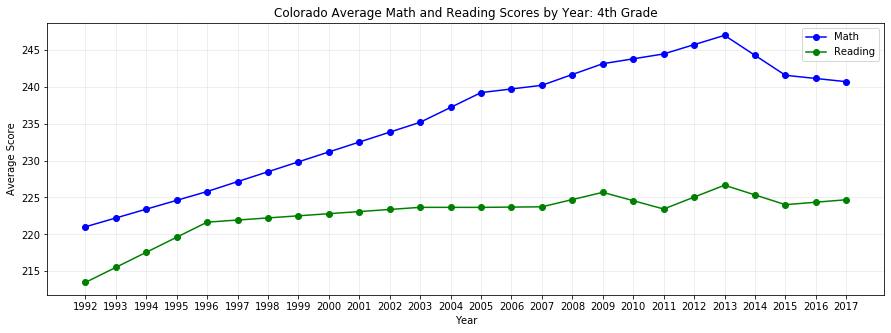

In [13]:
plt.figure(figsize=(15,5))
plt.plot(co_df.YEAR, co_df.AVG_MATH_4_SCORE, color='blue', label='Math', marker='o')
plt.plot(co_df.YEAR, co_df.AVG_READING_4_SCORE, color='green', label='Reading', marker='o')
plt.xticks(ticks=np.arange(1992,2018,1))
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True, alpha=.25)
plt.legend()
plt.title('Colorado Average Math and Reading Scores by Year: 4th Grade')
plt.show()

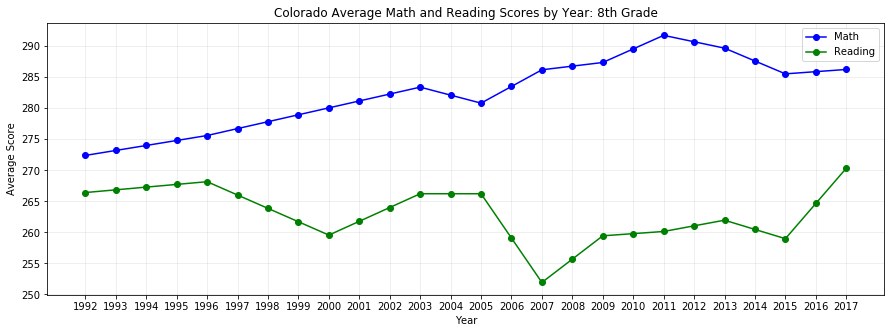

In [14]:
plt.figure(figsize=(15,5))
plt.plot(co_df.YEAR, co_df.AVG_MATH_8_SCORE, color='blue', label='Math', marker='o')
plt.plot(co_df.YEAR, co_df.AVG_READING_8_SCORE, color='green', label='Reading', marker='o')
plt.xticks(ticks=np.arange(1992,2018,1))
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True, alpha=.25)
plt.legend()
plt.title('Colorado Average Math and Reading Scores by Year: 8th Grade')
plt.show()

Scores have been better in math than reading every single year since 1992 for both 4th and 8th graders.

### 4. What are the distributions of the math and reading scores in the sample?

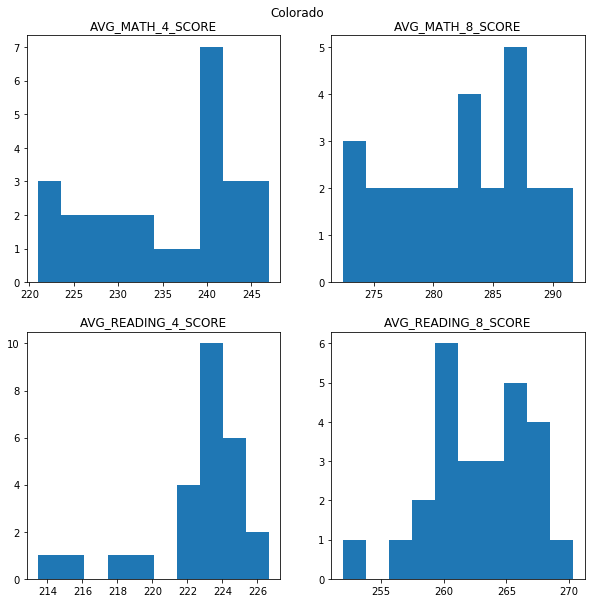

In [15]:
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(co_df.columns[-4:], start=1):
    plt.subplot(2,2,i)
    plt.hist(co_df[col])
    plt.title(col)
plt.suptitle('Colorado',y=.92)
plt.show()

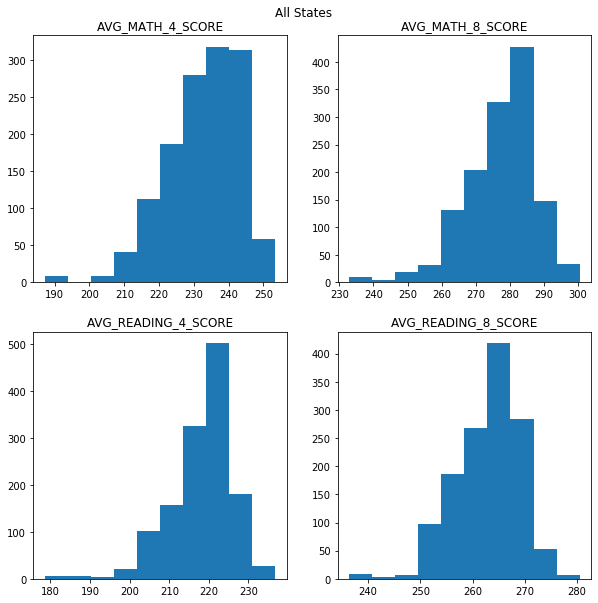

In [16]:
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(df.columns[-4:], start=1):
    plt.subplot(2,2,i)
    plt.hist(df[col])
    plt.title(col)
plt.suptitle('All States',y=.92)
plt.show()

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

This was already done before the exploration began. All values have been filled using interpolation by state and year.